In [1]:
import pathlib

path = pathlib.Path().joinpath('data')
data_path = path.joinpath('data.csv')
sub_path = path.joinpath('sample_submission.csv')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv(data_path, index_col='row_id')
data.head()

,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,F_1_9,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
row_id,,,,,,,,,,,,,,,,,,,,,
0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,-0.500665,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,-0.363425,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,0.595777,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,-2.217847,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,-1.143500,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943


In [3]:
# subset split
n_sub = 4

subset = [None, ]       # this is for a more familiar numbering
for n in range(n_sub):
    sub_cols = data.columns[data.columns.str.startswith(f'F_{n + 1}')]
    subset.append(data[sub_cols])

In [65]:
# check for NaN in colunms
for n, df in enumerate(subset[1:], 1):
    nan_cols = df.columns[df.isna().any()]
    print(f'Columns containing NaN in subset #{n}: {nan_cols.size} / {df.columns.size}')

Columns containing NaN in subset #1: 15 / 15
Columns containing NaN in subset #2: 0 / 25
Columns containing NaN in subset #3: 25 / 25
Columns containing NaN in subset #4: 15 / 15


In [64]:
# avg. NaN ratio
nan_cols = data.columns[data.isna().any()]
nan_ratio = (data[nan_cols].isna().sum() / data.shape[0]).mean().round(5)
print(f'Avg. NaN ratio: {nan_ratio}')

Avg. NaN ratio: 0.01818


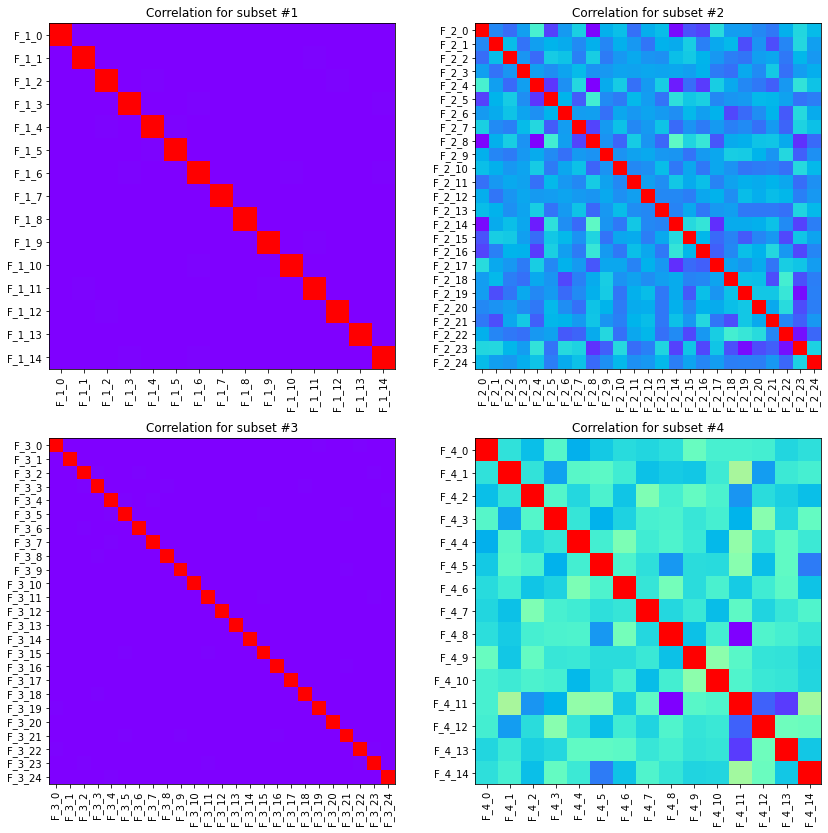

In [39]:
# correlations
fig, ax = plt.subplots(2, 2, figsize=(14, 14))

for n, df in enumerate(subset[1:]):
    x, y = n // 2, n % 2
    ax[x, y].set_title(f'Correlation for subset #{n + 1}')
    ax[x, y].imshow(df.corr(), cmap='rainbow')
    ax[x, y].set_yticks(ticks=range(df.shape[1]), labels=df.columns)
    ax[x, y].set_xticks(ticks=range(df.shape[1]), labels=df.columns, rotation=90)


As you can see, feature groups 2 and 4 have some linear correlation.

In [ ]:
#